### Objective : To build a CNN model to solve binary classfication problem for Heart Sound

In [ ]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Paths to the dataset folders
#DATASET_PATH = 'D:/programs/project/Training_Data_CAD_2016/'
DATASET_PATH ='F:/Training_Data_CAD_2016'
CATEGORIES = ['training-b-abnormal-2016', 'training-b-normal-2016', 'training-e-abnormal-2016', 'training-e-normal-2016']

In [10]:
# Parameters
SAMPLE_RATE = 16000
DURATION = 3  
MFCC_FEATURES = 40  
INPUT_SHAPE = (MFCC_FEATURES, 128, 1) 

def load_wav_files(data_path, categories):
    X, Y = [], []
    for category in categories:
        folder_path = os.path.join(data_path, category)
        label = 1 if 'abnormal' in category else 0  
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(folder_path, file_name)
                audio_data, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
                mfcc = librosa.feature.mfcc(y=audio_data, sr=SAMPLE_RATE, n_mfcc=MFCC_FEATURES)  
                mfcc = np.resize(mfcc, (MFCC_FEATURES, 128))  
                X.append(mfcc)
                Y.append(label)
    return np.array(X), np.array(Y)

In [11]:
# Load data
X, Y = load_wav_files(DATASET_PATH, CATEGORIES)

X = X[..., np.newaxis]

# Encode labels
Y = to_categorical(Y, num_classes=2)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Build the CNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation='softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = create_model(INPUT_SHAPE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 126, 32)       320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 38, 126, 32)       128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 61, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 17, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 30, 64)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 28, 128)       

In [13]:
# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=32)

Epoch 1/30
66/66 [==============================] - 4s 53ms/step - loss: 0.5366 - accuracy: 0.8708 - val_loss: 0.2942 - val_accuracy: 0.8914
Epoch 2/30
66/66 [==============================] - 3s 52ms/step - loss: 0.2343 - accuracy: 0.8894 - val_loss: 0.2777 - val_accuracy: 0.8914
Epoch 3/30
66/66 [==============================] - 3s 53ms/step - loss: 0.2099 - accuracy: 0.8937 - val_loss: 0.3310 - val_accuracy: 0.8914
Epoch 4/30
66/66 [==============================] - 3s 53ms/step - loss: 0.2073 - accuracy: 0.8922 - val_loss: 0.2416 - val_accuracy: 0.9067
Epoch 5/30
66/66 [==============================] - 3s 52ms/step - loss: 0.1868 - accuracy: 0.8970 - val_loss: 0.2019 - val_accuracy: 0.9105
Epoch 6/30
66/66 [==============================] - 4s 53ms/step - loss: 0.1865 - accuracy: 0.9089 - val_loss: 0.1495 - val_accuracy: 0.9524
Epoch 7/30
66/66 [==============================] - 3s 53ms/step - loss: 0.1689 - accuracy: 0.9127 - val_loss: 0.1570 - val_accuracy: 0.9276
Epoch 8/30
66

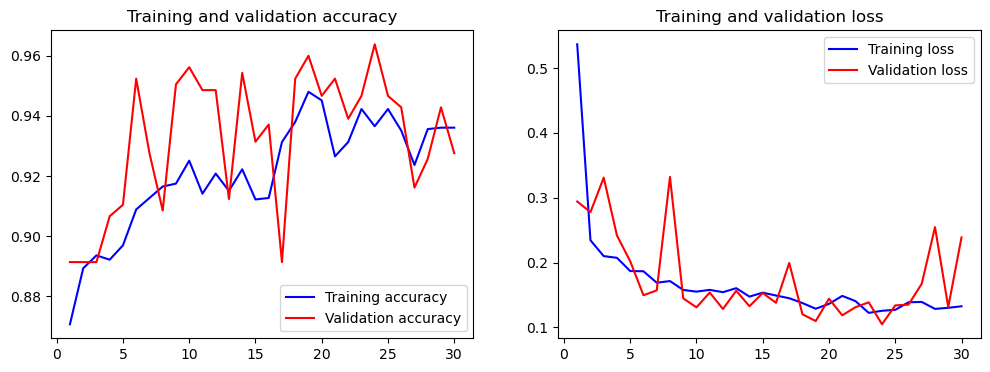

In [14]:
# Plotting accuracy and loss graphs
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       468
           1       0.91      0.37      0.53        57

    accuracy                           0.93       525
   macro avg       0.92      0.68      0.74       525
weighted avg       0.93      0.93      0.91       525



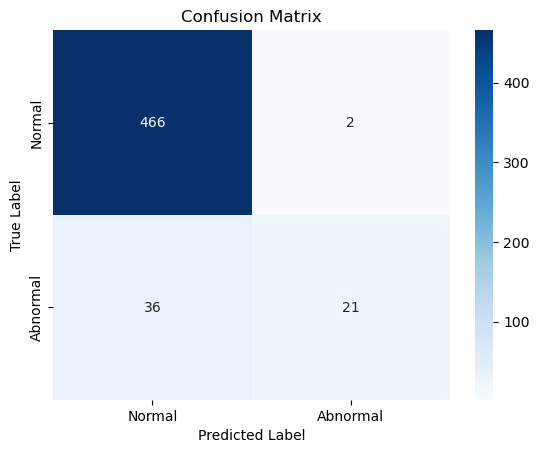

In [15]:
# Evaluate the model
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    print("Classification Report:\n", classification_report(Y_true, Y_pred_classes))
    
    cm = confusion_matrix(Y_true, Y_pred_classes)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

evaluate_model(model, X_test, Y_test)

In [19]:
# Function to predict on a new WAV file
def predict_wav_file(file_path, model):
    audio_data, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=SAMPLE_RATE, n_mfcc=MFCC_FEATURES)
    mfcc = np.resize(mfcc, (MFCC_FEATURES, 128))
    mfcc = mfcc[np.newaxis, ..., np.newaxis]  
    prediction = model.predict(mfcc)
    predicted_label = np.argmax(prediction)

    if predicted_label == 1:
        print(f"The predicted class for {file_path} is: Abnormal")
    else:
        print(f"The predicted class for {file_path} is: Normal")

In [21]:
# Predict unknown input
test_file = r'F:\Training_Data_CAD_2016\Unknown abnormal\e00020.wav'
#test_file = r'F:\programs\project\test_wav\a0001.wav'
predict_wav_file(test_file, model)

The predicted class for F:\Training_Data_CAD_2016\Unknown abnormal\e00020.wav is: Abnormal


In [22]:
# Predict unknown input
test_file = r'F:\Training_Data_CAD_2016\Unknown normal\b0001.wav'
#test_file = r'F:\programs\project\test_wav\a0001.wav'
predict_wav_file(test_file, model)

The predicted class for F:\Training_Data_CAD_2016\Unknown normal\b0001.wav is: Normal


In [23]:
# Predict unknown input
test_file = r'F:\Training_Data_CAD_2016\Unknown normal\b0001.wav'
#test_file = r'F:\programs\project\test_wav\a0001.wav'
predict_wav_file(test_file, model)

The predicted class for F:\Training_Data_CAD_2016\Unknown normal\b0001.wav is: Normal
